# Spectractor Simulation

Goal is to process a series of images in order to produce spectra

- author Sylvie Dagoret-Campagne
- date : April 05th 2018


In [71]:
theNotebook="Run_SpectractorSim"

# Spectractor Launcher

In [72]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

## Required packages 

In [73]:
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

In [74]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),   #defines the default image size
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [76]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

## Tools

Spectractor is supposed to be installed in paralel to Spectractorsim

In [77]:
PATH_SPECTRACTOR='../Spectractor'

In [78]:
sys.path.append(PATH_SPECTRACTOR)
#from common_notebook import *
#init_notebook()

## Spectractor 

In [79]:
from spectractor import *

In [80]:
from tools import *
from holo_specs import *
from targets import *
from optics import *
import parameters 

## SpectractorSim

In [81]:
from spectractorsim import *

# Configuration

## Input Directory

### So use HD205905

In [82]:
#inputdir="/sps/lsst/data/AtmosphericCalibration/CTIODataJune2017_reduced_RG715_v2/data_30may17"
inputdir="/Users/dagoret/DATA/CTIODataJune2017_reduced_RG715_v2/data_30may17"
#MIN_IMGNUMBER=208
MIN_IMGNUMBER=230
MAX_IMGNUMBER=284
date="20170530"
object_name='HD205905'
tag = "reduc"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2
subdir=os.path.basename(inputdir)

# Output directory

In [83]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory
outputdir="./simspectra"
#ensure_dir(outputdir)

# Logbook

For the moment, the logbook is in the local directory

In [84]:
file_logbook_csv='ctiofulllogbook_jun2017_v3.csv'
file_logbook_xlsx='ctiofulllogbook_jun2017_v3.xlsx'

In [85]:
#df=pd.read_csv(file_logbook_csv,index_col=0)
df=pd.read_excel(file_logbook_xlsx,index_col=0)

In [86]:
df.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
215,2017-05-30T21:17:00.652,data_30may17,1,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_001.fits,NaN,NaN,NaN,NaN,NaN,NaN
147,2017-05-30T21:17:44.185,data_30may17,2,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.6,36,5.6,reduc_20170630_002.fits,NaN,NaN,NaN,NaN,NaN,NaN
13,2017-05-30T21:18:27.708,data_30may17,3,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.9,reduc_20170630_003.fits,NaN,NaN,NaN,NaN,NaN,NaN
45,2017-05-30T21:19:11.234,data_30may17,4,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_004.fits,NaN,NaN,NaN,NaN,NaN,NaN
218,2017-05-30T21:19:54.772,data_30may17,5,bias,RG715,Ron400,1.181,0.0,12650,1.724,...,7.5,36,4.7,reduc_20170630_005.fits,NaN,NaN,NaN,NaN,NaN,NaN


# Extract the relevant data and sort by the column index

In [87]:
all_obs=df.loc[(df["subdir"]==subdir) & (df["object"]==object_name),:].sort_values(by=['index'])

In [88]:
all_obs.head()

,date,subdir,index,object,filter,disperser,airmass,exposure,focus,seeing,...,T,RH,W,file,Obj-posXpix,Obj-posYpix,Dx,Dy,comment,skip
71,2017-05-31T07:54:38.806,data_30may17,210,HD205905,dia,Ron400,1.101,60.0,12400,0.793,...,9.5,23,11.6,reduc_20170530_210.fits,790.0,700.0,100.0,100.0,NaN,NaN
39,2017-05-31T07:56:31.293,data_30may17,211,HD205905,dia,Thor300,1.097,60.0,12400,0.793,...,9.4,24,11.5,reduc_20170530_211.fits,790.0,700.0,100.0,100.0,NaN,NaN
5,2017-05-31T07:58:23.653,data_30may17,212,HD205905,dia,HoloPhP,1.094,60.0,12400,0.793,...,9.5,24,10.5,reduc_20170530_212.fits,790.0,700.0,100.0,100.0,NaN,NaN
110,2017-05-31T08:00:16.053,data_30may17,213,HD205905,dia,HoloPhAg,1.090,120.0,12400,0.793,...,9.7,23,12.0,reduc_20170530_213.fits,790.0,700.0,100.0,100.0,NaN,NaN
149,2017-05-31T08:03:08.495,data_30may17,214,HD205905,dia,HoloAmAg,1.085,120.0,12400,0.793,...,9.6,23,13.4,reduc_20170530_214.fits,790.0,700.0,100.0,100.0,NaN,NaN


# Extract relevant info for SpectractorSim

In [89]:
target_tosimspec=all_obs[['index','object','airmass','filter','disperser','exposure','P','T','RH','file','date']]

In [90]:
target_tosimspec.head()

,index,object,airmass,filter,disperser,exposure,P,T,RH,file,date
71,210,HD205905,1.101,dia,Ron400,60.0,782,9.5,23,reduc_20170530_210.fits,2017-05-31T07:54:38.806
39,211,HD205905,1.097,dia,Thor300,60.0,782,9.4,24,reduc_20170530_211.fits,2017-05-31T07:56:31.293
5,212,HD205905,1.094,dia,HoloPhP,60.0,782,9.5,24,reduc_20170530_212.fits,2017-05-31T07:58:23.653
110,213,HD205905,1.090,dia,HoloPhAg,120.0,782,9.7,23,reduc_20170530_213.fits,2017-05-31T08:00:16.053
149,214,HD205905,1.085,dia,HoloAmAg,120.0,782,9.6,23,reduc_20170530_214.fits,2017-05-31T08:03:08.495


### Setting the parameters of SpectractorSim

In [91]:
parameters.DEBUG = True
parameters.VERBOSE = True

In [92]:
for index, row in target_tosimspec.iterrows():
    index=row['file']
    targetname=row['object']
    airmass=row['airmass']
    filename_data=row['file']
    filtername=row['filter']
    dispersername=row['disperser']
    exposure=row['exposure']
    pressure=row['P']
    temperature=row['T']
    rhumidity=row['RH']
    date=row['date']
    print '******* spectrum id=',index, ' airmass =',airmass,' pressure =',pressure
    SpectractorSim(filename_data,outputdir,targetname,index,airmass,pressure,temperature,rhumidity,exposure,filtername,dispersername)
    break

2018-04-05 12:35:50  spectractorsim SpectractorSim       INFO   
	Start SPECTRACTORSIM
2018-04-05 12:35:50  spectractorsim SpectractorSim       INFO   
	Will simulate the spectrum...
2018-04-05 12:35:50  spectractorsim SpectractorSim       INFO   
	Will debug simulated the spectrum...


******* spectrum id= reduc_20170530_210.fits  airmass = 1.101  pressure = 782
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  0.0
 3) oz =  250.0
 4) aer =  0.0
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv0_oz25_aer0.INP')
('Output to file                : ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv0_oz25_aer0.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv0_oz25_aer0.INP > simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv0_oz25_aer0.OUT')
(800,) (28, 804)
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  0.0
 3) oz =  350.0
 4) aer =  0.0
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/

(800,) (28, 804)
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  5.0
 3) oz =  250.0
 4) aer =  0.1
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv50_oz25_aer10.INP')
('Output to file                : ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv50_oz25_aer10.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv50_oz25_aer10.INP > simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv50_oz25_aer10.OUT')
(800,) (28, 804)
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  5.0
 3) oz =  350.0
 4) aer =  0.1
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv50_oz35_aer

(800,) (28, 804)
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  10.0
 3) oz =  250.0
 4) aer =  0.2
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv100_oz25_aer20.INP')
('Output to file                : ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv100_oz25_aer20.OUT')
('uvspec cmd: ', '/Users/dagoret//MacOSX/External/libRadtran/libRadtran-2.0.1/bin/uvspec  < simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv100_oz25_aer20.INP > simulations/RT/2.0.1/CT/pp/us/as/rt/out/RT_CT_pp_us_as_rt_z11_wv100_oz25_aer20.OUT')
(800,) (28, 804)
--------------------------------------------
 1) airmass =  1.101
 2) pwv =  10.0
 3) oz =  350.0
 4) aer =  0.2
 5) pressure = 782
--------------------------------------------
('Running uvspec with input file: ', 'simulations/RT/2.0.1/CT/pp/us/as/rt/in/RT_CT_pp_us_as_rt_z11_wv100_o

In [118]:
!ls -l test

total 360
-rw-r--r--  1 dagoret  LAL\Utilisateurs du domaine  184320 Apr  5 12:41 reduc_20170530_213_atmsim.fits


In [106]:
!ls simspectra

reduc_20170530_210_atmsim.fits
reduc_20170530_210_spectrumsim_atmsim.fits


In [107]:
hdu= fits.open('test/reduc_20170530_213_atmsim.fits') 

In [108]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  804                                                  
NAXIS2  =                   28                                                  
ATMSIM  = 'libradtran'                                                          
SIMVERS = '2.0.1   '                                                            
DATA    = 'reduc_20170530_213.fits'                                             
AIRMASS =                1.094                                                  
PRESSURE=                  782                                                  
TEMPERAT=                  9.5                                                  
NBATMPTS=                   27                                                  
NBAERPTS=                   

In [109]:
data=hdu[0].data

In [116]:
data[1,:5]

array([1.000000e+00, 0.000000e+00, 0.000000e+00, 2.500000e+02,
       2.507607e-02])

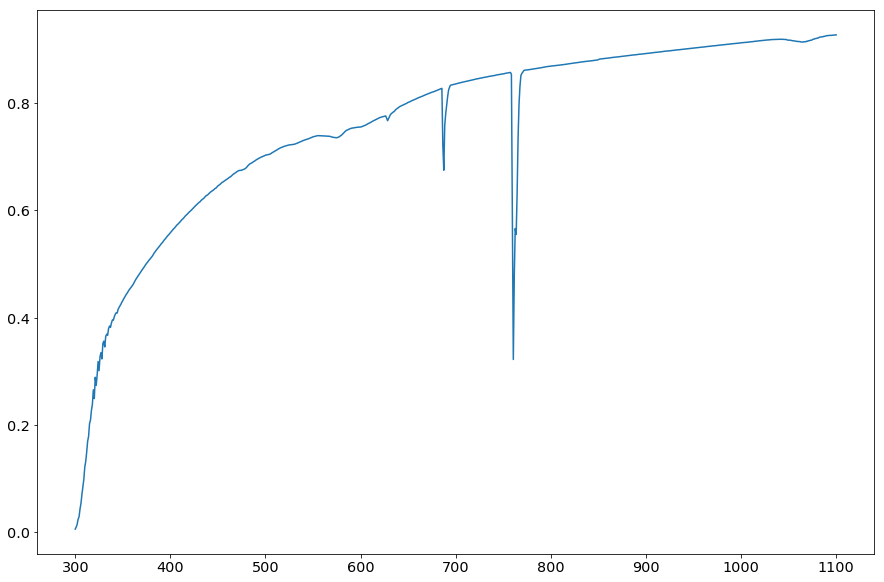

In [112]:
plt.plot(data[0,4:],data[20,4:])